In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [177]:
X, Y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 1.3,
    random_state = 7
)

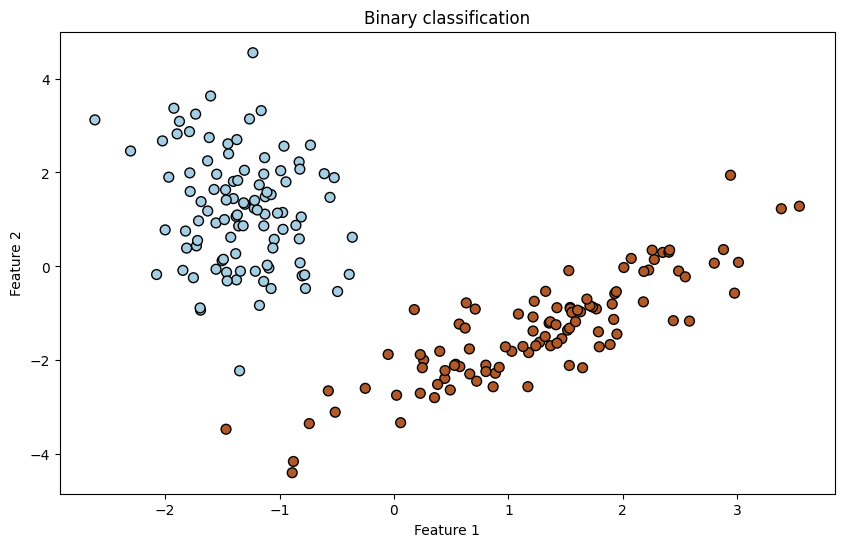

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, s=50, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary classification")
plt.show()

In [179]:
class Sigmoid_Perceptron:
    def __init__(self, eta0=0.01, max_itr=1000):
        self.coef_ = None
        self.intercept_ = None
        self.eta0 = eta0
        self.max_itr = max_itr
    
    def fit(self, X_train, Y_train):
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        X_train = np.insert(X_train, 0, 1, axis=1)
        n_sample = X_train.shape[0]
        n_feature = X_train.shape[1]
        W = np.ones(n_feature)
        for i in range(self.max_itr):
            rand_i = np.random.randint(0,n_sample)
            Y_pred = self.sigmoid_func(np.dot(X_train[rand_i], W))
            W = W + self.eta0 * (Y_train[rand_i] - Y_pred) * X_train[rand_i]
        self.coef_ = W[1:]
        self.intercept_ = W[0]

    def predict(self, X_test):
        return self.sigmoid_func(np.dot(X_test, self.intercept_)) + self.intercept_
    
    @staticmethod
    def step_func(val):
        return 1 if val>=0 else 0
    
    @staticmethod
    def sigmoid_func(val):
        return 1 / (1+np.exp(-val))

In [180]:
perceptron = Perceptron(eta0=0.1, max_itr=200)

In [181]:
perceptron.fit(X, Y)

In [182]:
print("Coefficients: ", perceptron.coef_)
print("Intercepts: ", perceptron.intercept_)

Coefficients:  [ 2.21712395 -1.3099793 ]
Intercepts:  0.40618438082103386


In [183]:
m = -(perceptron.coef_[0]/perceptron.coef_[1])
b = -(perceptron.intercept_/perceptron.coef_[1])
X_plt_inp = np.linspace(-3,3,100)
Y_plt_inp = m * X_plt_inp + b

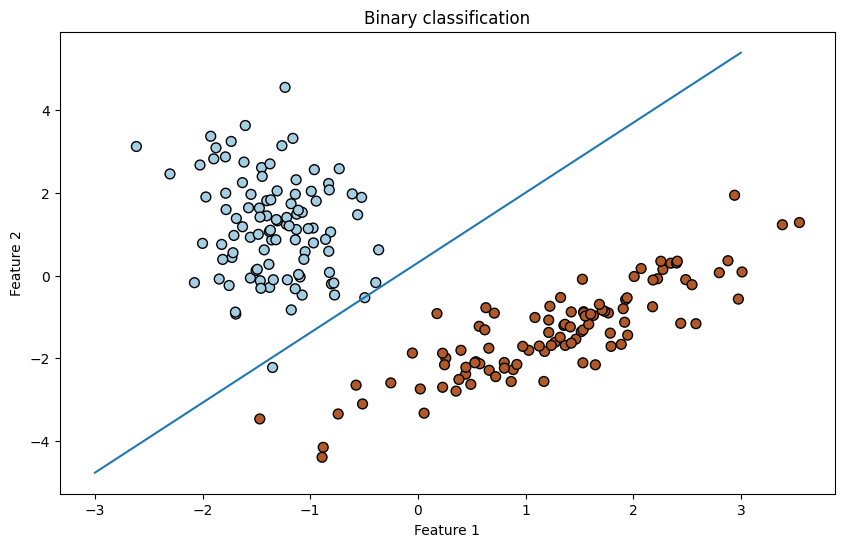

In [184]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired, s=50, edgecolor='k')
plt.plot(X_plt_inp, Y_plt_inp)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary classification")
plt.show()